Seaborn 是基于 matplotlib 开发的高阶 Python 数据可视图库，用于绘制优雅、美观的统计图形。


In [54]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
np.random.seed(1031)

In [55]:
# 配色
r_hex = '#dc2624'  # red,       RGB = 220,38,36
dt_hex = '#2b4750'  # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'  # teal,      RGB = 69,160,162
r1_hex = '#e87a59'  # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'  # teal,      RGB = 125,202,169
g_hex = '#649E7D'  # green,     RGB = 100,158,125
o_hex = '#dc8018'  # orange,    RGB = 220,128,24
tn_hex = '#C89F91'  # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'  # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'  # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'  # grey-25,   RGB = 199,204,207

![](./img/画图配色.png)

In [56]:
# 将上面自定义颜色设置为 seaborn 里调色板，当然你可以用它里面默认调色板
color = [
    '#dc2624', '#2b4750', '#45a0a2', '#e87a59', '#7dcaa9', '#649E7D',
    '#dc8018', '#C89F91', '#6c6d6c', '#4f6268', '#c7cccf'
]
sns.set_palette(color)

# 深度了解Seaborn

## 检查数据

在开始分析数据之前,提早检查并修正数据中的错误能节省大量时间.关于数据检查一般需要我们回答一下几个问题:

- 数据格式有什么问题吗?
- 数据数值有什么问题吗?
- 数据需要修复或者删除吗?

In [57]:
iris_data = pd.read_csv(
    './data/data for seaborn/iris-data.csv', na_values=['NA'])
iris_data.head(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


干净数据的定义:每一列代表一个特征,每一行代表一个样例

- 数据的第一行定义了列标题，标题的描述足以让我们了解每个列代表的内容 (萼片长度，萼片宽度，花瓣长度和花瓣宽度)，标题甚至给我们记录测量的单位 (cm, 厘米)



- 第一行之后的每一行代表一个花的观测数据：四个测量指标和一个类 (class)，它告诉我们花的种类。比如前 10 个都是山鸢尾花 (注意第 8 到 10 个的花瓣宽度没有数据，用 NaN 来表示)。

## 数据统计

In [58]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- describe() 函数的产出每列数据的个数 (count)，均值 (mean)，标准差 (std)，最小值 (min)，25, 50 和 75 百分位数 (25%, 50%, 75%) 和最大值 (max)。50 百分位数也就是中位数 (median)。



- 从该表中看到几个有用的值。 例如，我们看到缺少 5 条花瓣宽度的数据 (表里 count 那一行的萼片长度，萼片宽度和花瓣长度的个数都是 150 个，唯独花瓣宽度是 145 个)。

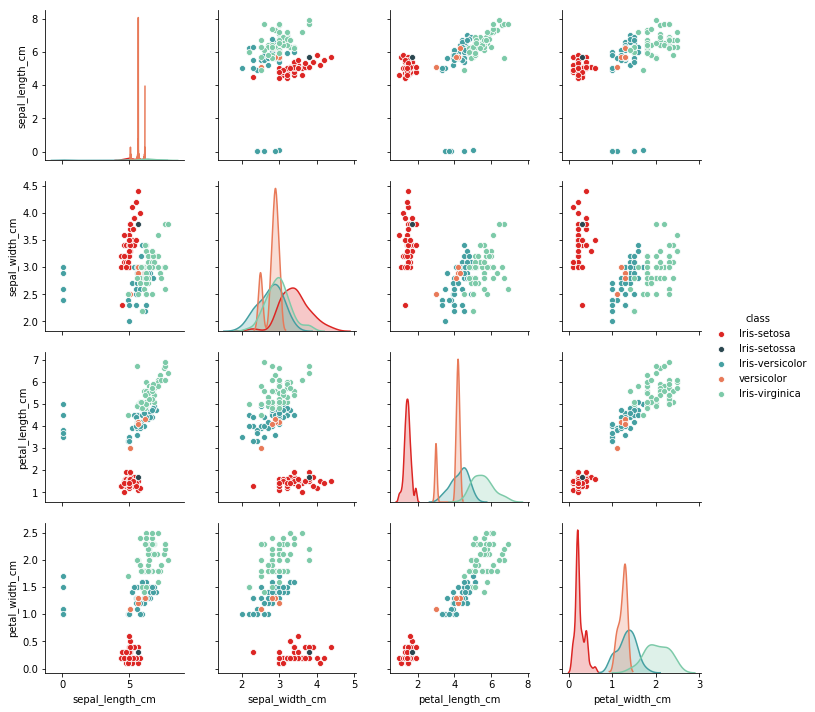

In [59]:
sns.pairplot(iris_data.dropna(), hue='class')

上面 pairplot() 函数里



- 第一个参数 iris_data.dropna() 就是除去 NaN 的数据表，这么做原因很简单，图里不可能显示的出 NaN 值的。



- 第二个参数 hue = 'class' 就是根据类 (class) 下不同的值赋予不同的颜色 (hue 就是色彩的意思) 。

配对图 (pairplot) 绘制前四列变量的关系图，而且用不同颜色区分不同的类下面的这四个变量。 从上图可知，横轴纵轴都有四个变量，那么总共可以画出 16 (4*4) 张小图。



- 对角线上的 4 张都是某个变量和自身的关系，用分布图 (dist plot)。



- 非对角线的 12 张就是某个变量和另一个变量的关系，用散点图 (scatter plot)。比如第一行第二列的图描述的就是萼片长度 (看纵轴第一个 sepal_length_cm 字样) 和萼片宽度 (看横轴第二个 sepal_width_cm 字样)。

从「配对图」中，我们可以迅速看出数据集上的一些问题：



- 图的右侧标注这五个类 (Iris-setosa, Iris-setossa, Iris-versicolor, versicolor, Iris-virginica)，但原本要分类的花只有三类 (Iris-setosa, Iris-versicolor, Iris-virginica)。这意味着在记录数据时可能会犯下一些错误。



- 在测量中有一些明显的异常值可能是错误的。

    - 第二行的图 1-2-4 (或第二列的图1-2-4)，对于 Iris-setosa，一个萼片宽度 (sepal_width) 值落在其正常范围之外。
    - 第一行后三张图 (或第一列后三张图)，对于 Iris-versicolor，几个萼片长度 (sepal_length) 值都接近零。



### 修正点1：数据类别

问题：按理说鸢尾花应该只有三类，而图中却显示有五类。

在与现场研究人员交谈后，得知研究员



- 忘记在 Iris-versicolor 之前添加 Iris-

- 在 Iris-setossa 中多打了一个 s

In [60]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

第一行将 versicolor 改为 Iris-versicolor；第二行将 Iris-setossa 改为 Iris-setosa；第四行用 unique() 函数 (unique 有唯一不重复的意思) 检验修改过的数据只有三类，更新后再画「配对图」。

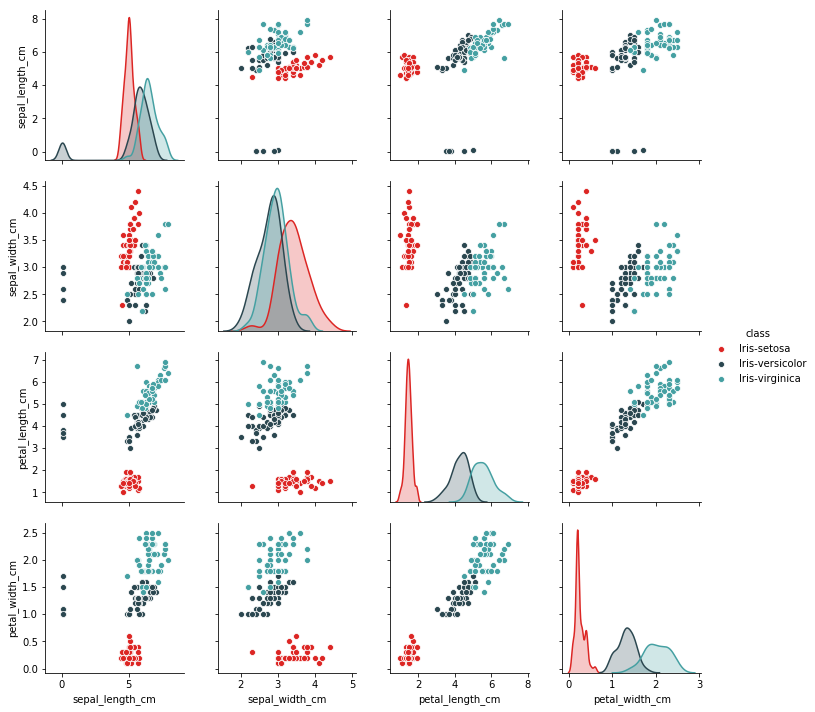

In [61]:
sns.pairplot(iris_data.dropna(), hue='class')

### 修正点2:异常值

修正异常值 (outliers) 是一件棘手的事情。因为我们很难判断异常值是否由测量误差引起，或者是不正确的单位记录数据，或者是真正的异常。如果我们决定排除任何数据，需要记录排除的数据并提供排除该数据的充分理由。由上节所知，我们有两种类型的异常值。

- **问题 1**：山鸢尾花的一个萼片宽度值落在其正常范围之外 (黄色高亮)。

我们的研究人员知道，山鸢尾花 (Iris-setosa) 的萼片宽度 (sepal_width_cm) 不可能低于 2.5 厘米。显然，这个记录是错误的，这种情况下最有效的方法是删除它而不是花时间查找原因。但是，我们仍需要知道有多少个类似这样的错误数据，如果很少删除它没有问题，如果很多我们需要查明原因。

In [62]:
cond = (iris_data['class'] == 'Iris-setosa') & (iris_data['sepal_width_cm'] <
                                                2.5)
iris_data.loc[cond]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
41,4.5,2.3,1.3,0.3,Iris-setosa


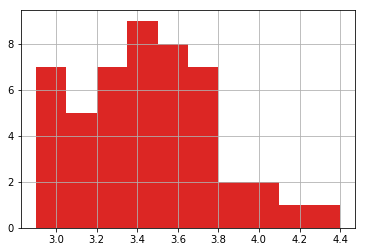

In [63]:
# 去掉 Iris-setosa 里萼片宽度小于 2.5 厘米的数据，然后画出其条形图
iris_data = iris_data.loc[~cond]
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

- **问题 2**：变色鸢尾花的几个萼片长度值接近与零 (黄色高亮)。

所有这些接近零的 sepal_length_cm 似乎错位了两个数量级，好像它们的记录单位米而不是厘米。在与实地研究人员进行了一些简短的对话后，我们发现其中一个人忘记将这些测量值转换为厘米。



我们使用代码来修正这些错误。

In [64]:
cond = (iris_data['class'] == 'Iris-versicolor') & (
    iris_data['sepal_length_cm'] < 1.0)
iris_data.loc[cond]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


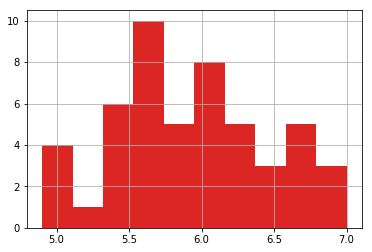

In [65]:
# 将萼片长度乘以 100 倍，从单位米换成单位厘米，然后画出其条形图
iris_data.loc[cond, 'sepal_length_cm'] *= 100.0

iris_data.loc[iris_data['class'] ==
              'Iris-versicolor', 'sepal_length_cm'].hist()

### 修正点3:缺失值

对于NaN 这样的缺失值 (missing value)。通常我们有两种方式来处理这类数据。



- 删除 (deletion)

- 插补 (imputation)

所有缺失的值都属于 Iris-setosa类，直接删除可能会对日后数据分析带来偏差。此外，可以用插补方法，其最常见的方法平均插补 (mean imputation)。其做法就是“假设知道测量的值落在一定范围内，就可以用该测量的平均值填充空值”。

In [66]:
# 首先查看缺失值在 DataFrame 哪个位置
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


上面代码里面 iris_data[A].isnull() 语句是找出 A 列中值为 NA 或 NaN 的行，而 "|" 是“或”的意思。因此上面整句话是找到萼片长度，萼片宽度，花瓣长度和花瓣宽度这四列下的所有含 NaN 的行数据，最后发现只有 5 行，而且 NaN  都来自花瓣宽度。

In [67]:
# 用 mean() 求出其宽度的平均值，用其将 NaN 值全部代替，最后打印出那 5 行插补后的 DataFrame
isSetosa = iris_data['class'] == "Iris-setosa"
average_petal_width = iris_data.loc[isSetosa, 'petal_width_cm'].mean()
iris_data.loc[isSetosa & (iris_data['petal_width_cm'].isnull()
                          ), 'petal_width_cm'] = average_petal_width
iris_data.loc[isSetosa & (iris_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [68]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


为了确保所有 NaN 值已被替换，再次用 iris_data[A].isnull() 语句来查看，出来的结果是一个只有列标题的空数据表。这表示表内已经没有 NaN 值了

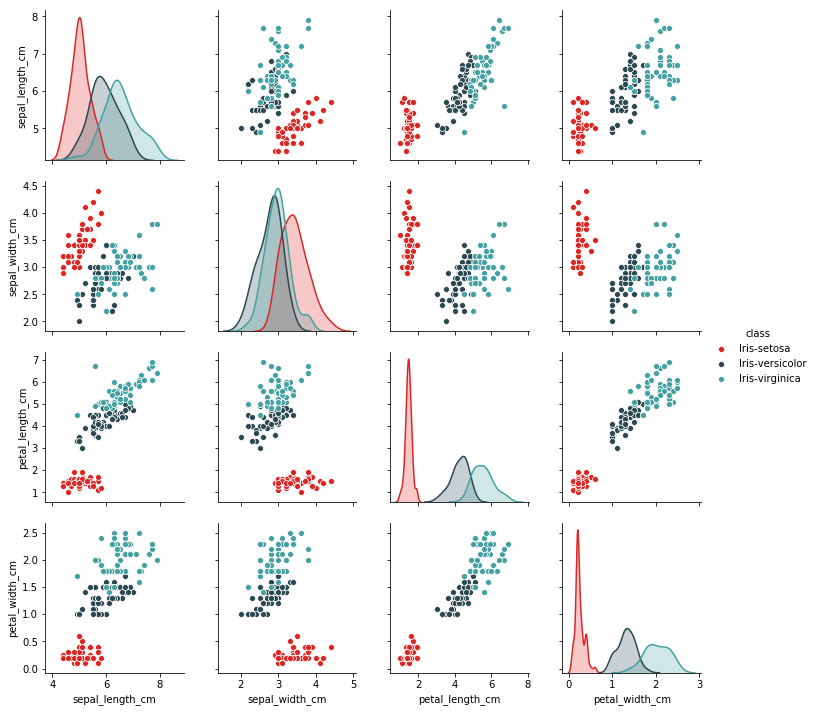

In [69]:
sns.pairplot(iris_data, hue='class')

## 风格设置

seaborn中风格选择比较自由,
- 用 set_style() 选五种风格：darkgrid, whitegrid, dark, white 和 ticks .

- 用 set_palette() 六种调色盘：deep, muted, pastel, bright, dark 和 colorblind


In [77]:
sns.set(style='ticks')

## 无标签的图

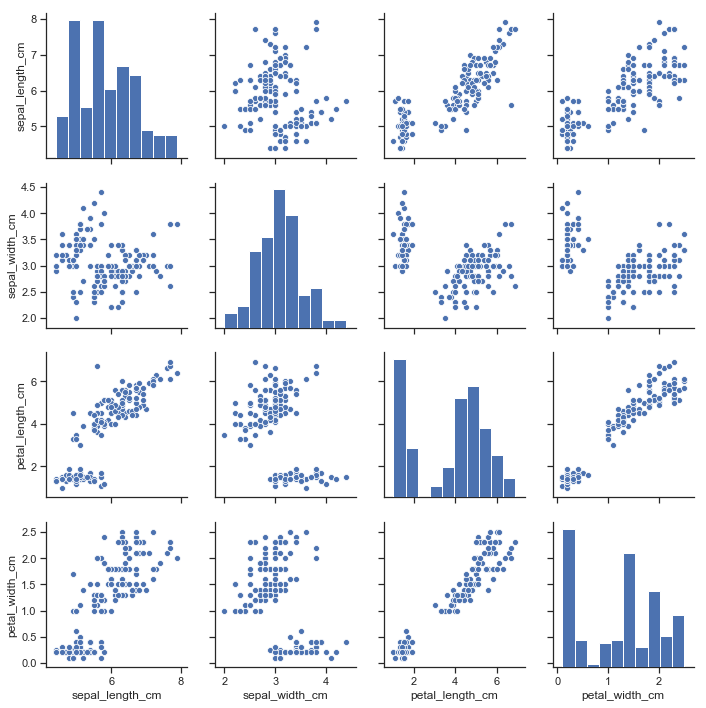

In [78]:
# 无数据标签的图(无监督学习里的聚类问题)
sns.pairplot(iris_data)

## 有标签的图

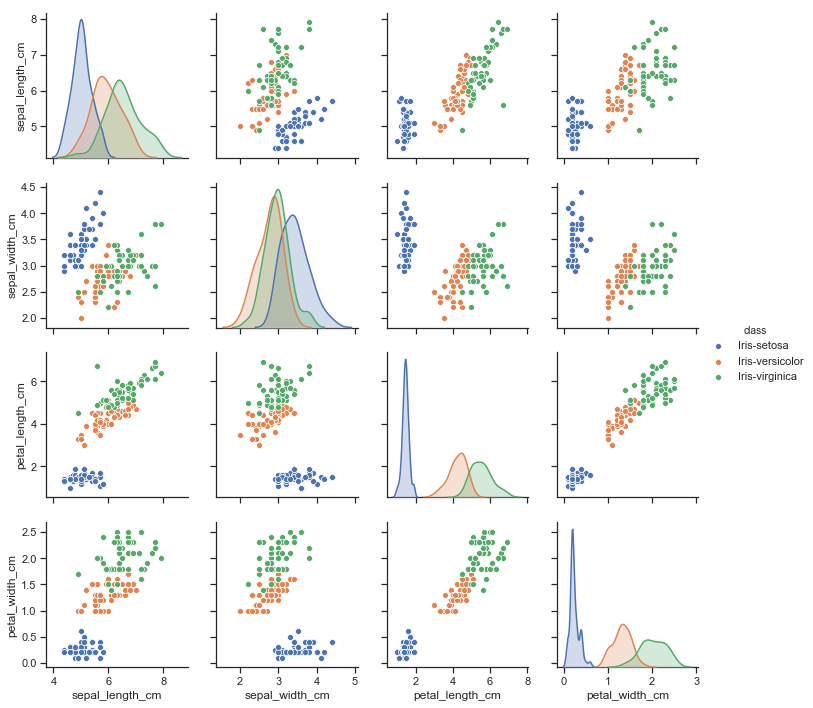

In [79]:
# 带数据标签的图(有监督学习里分类问题),那么画出来的「配对图」是多色调的，
# 只需把 hue 变量设置成 DataFrame 数据里的标签名
sns.pairplot(iris_data, hue='class')

## 设置色板

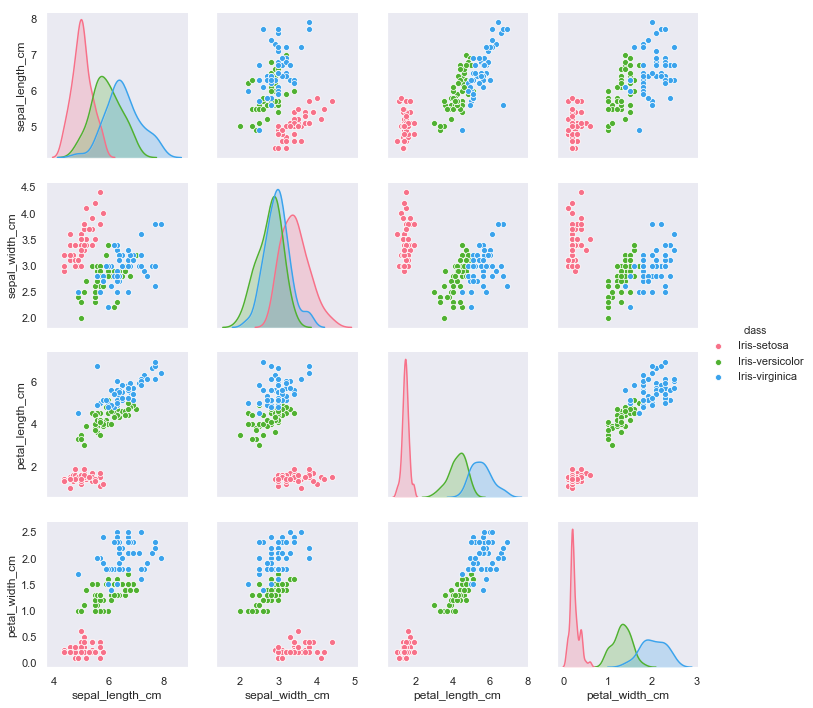

In [81]:
# 将风格设置为 dark (背景变成灰色)，色板设置成 husl
sns.set_style('dark')
sns.pairplot(iris_data, hue='class', palette='husl')

husl 其实就是一个色彩系统，取 10 个样本颜色展示如下：

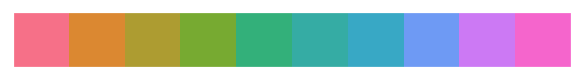

In [82]:
sns.palplot(sns.color_palette('husl', 10))

## 设置标记

将风格设置为 darkgrid (背景变成带网格的灰色)，色板设置成 colorblind 为色盲用户着想，甚至将不同类用圆形 (o)、正方形 (s) 和方块 (D) 来标记

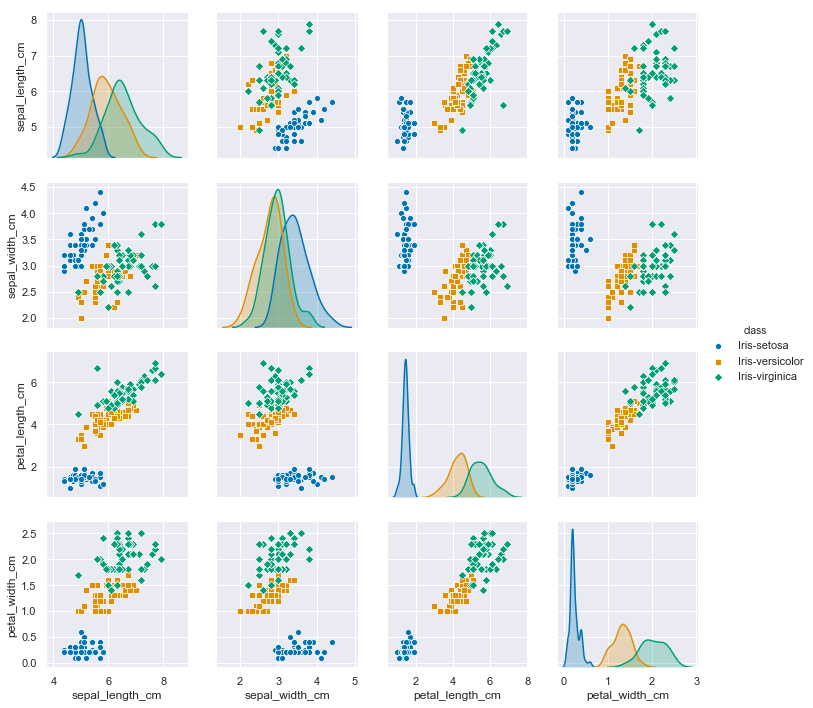

In [83]:
sns.set_style('darkgrid')
sns.set_palette('colorblind')
sns.pairplot(iris_data, hue='class', markers=['o', 's', 'D'])

## 子集图

如果我们不想展示所有变量之间的关系图，我们可以选择子集图。



将风格设置为 whitegrid (背景变成带网格的白色)，并将横轴和纵轴赋予相同的子集变量 (都是 vars)。

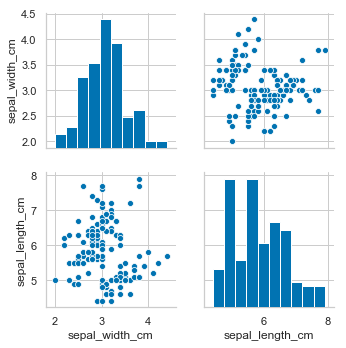

In [84]:
sns.set_style('whitegrid')
sns.pairplot(iris_data, vars=['sepal_width_cm', 'sepal_length_cm'])

将风格设置为 white (背景变成白色)，并将横轴和纵轴赋予不同的子集变量 (x_vars 和 y_vars)

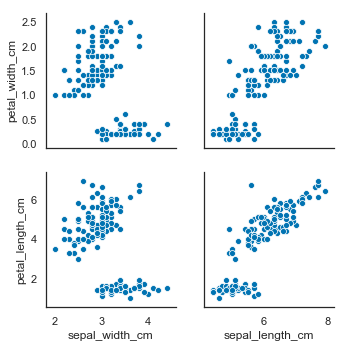

In [86]:
sns.set_style('white')
sns.pairplot(
    iris_data,
    x_vars=['sepal_width_cm', 'sepal_length_cm'],
    y_vars=['petal_width_cm', 'petal_length_cm'])

## 线性回归图

pairplot() 除了画出变量之间的关系图，通过设置里面参数 kind = 'reg'，还可在非对角图上对那些散点做线性回归

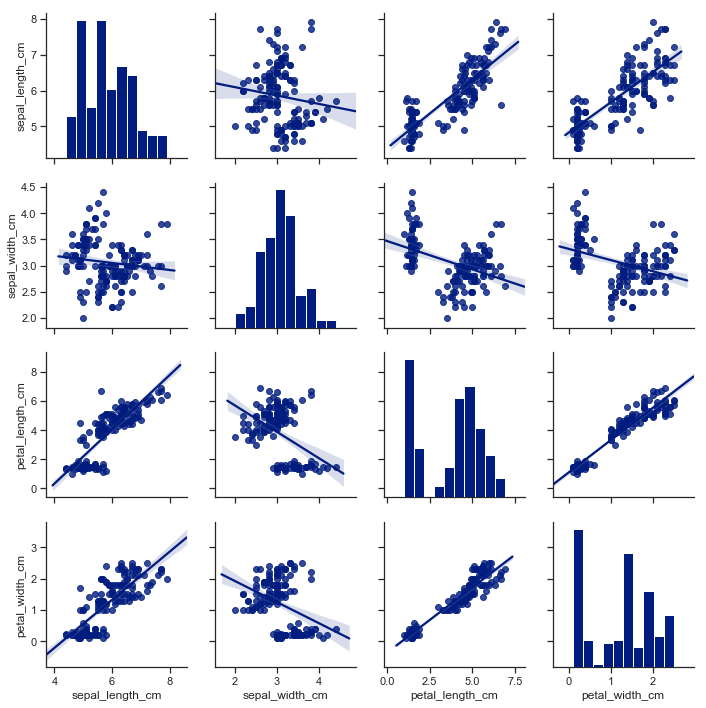

In [87]:
sns.set_style('ticks')
sns.set_palette('dark')
sns.pairplot(iris_data, kind='reg')

## 核密度图

pairplot() 除了画出变量之间的关系图，通过设置里面参数 diag_kind = 'kde'，还可在对角图上对那些直方图的点做核密度估计 (KDE, kernel density estimation)，该技巧在做平滑数据时用到。

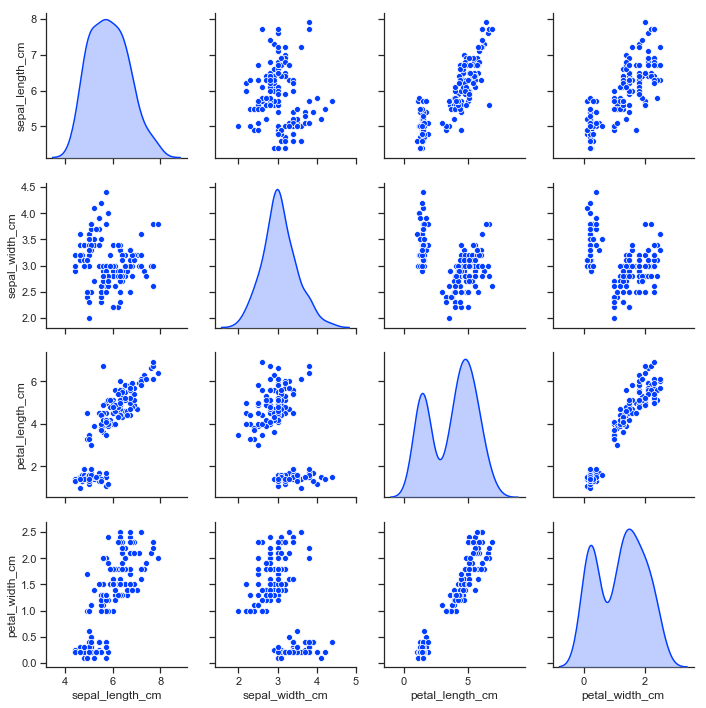

In [89]:
# 色板设置成 bright，颜色顿时明亮了许多 (浅蓝)
sns.set_palette('bright')
sns.pairplot(iris_data, diag_kind='kde')

# 广度了解Seaborn

In [94]:
# 加载 Seaborn 提供的内置数据集 Titantic
titanic = sns.load_dataset('titanic')
titanic.head(3).append(titanic.tail(3))

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


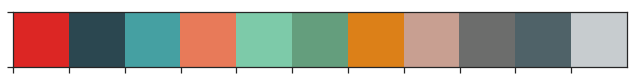

In [95]:
sns.set_palette( color )
sns.palplot( sns.color_palette(color,11) )

## 条形图

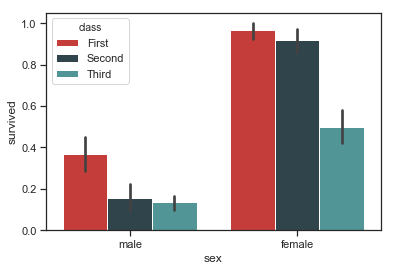

In [97]:
# 对于男性和女性 (x='sex')，根据不同船票各等舱 (hue='class')，
#统计其生还率 (y='survived')。用颜色区分舱的等级
sns.barplot( x='sex', 
             y='survived',
             hue='class',
             data=titanic )

## 计数图

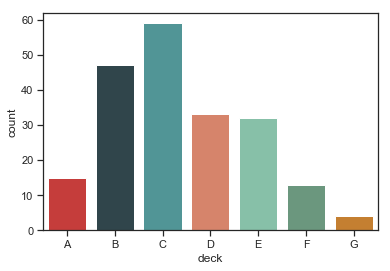

In [98]:
# 统计每层客舱 (x='deck') 里的人数
sns.countplot( x='deck',
               data=titanic )

## 点图

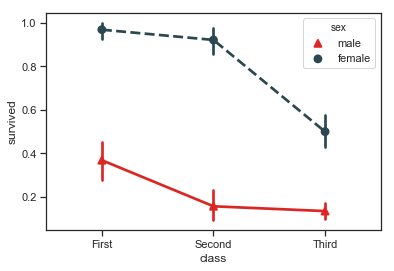

In [99]:
# 统计每等舱 (x=‘class’) 不同性别 (hue='sex‘) 的生还率 (y='survived')。用颜色区分性别
sns.pointplot( x='class',
               y='survived',
               hue='sex',
               data=titanic,
               markers=['^','o'],
               linestyles=['-','--'] )

## 箱型图

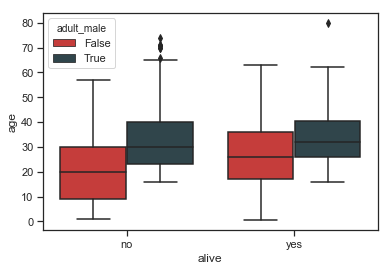

In [100]:
# 统计在生还和死亡 (x='alive') 成年和未成年男性 (hue='adult_male') 的年龄分布 (y='age')
#用颜色区分是否成年
sns.boxplot( x='alive',
             y='age',
             hue='adult_male',
             data=titanic )

## 小提琴图

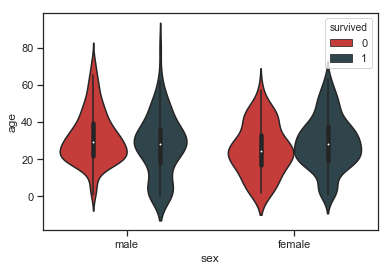

In [101]:
# 统计在男性和女性 (x='sex') 两类里生还和死亡 (hue='survived') 的年龄分布 (y='age')。
# 用颜色区分生还率
sns.violinplot( x='sex',
                y='age',
                hue='survived',
                data=titanic )

## 箱型水平图

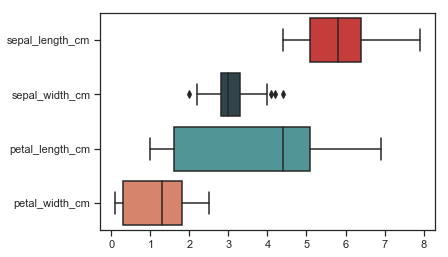

In [102]:
# 画出萼片长度，萼片宽度，花瓣长度和花瓣宽度的箱形图 (横向)
sns.boxplot( data=iris_data, 
             orient='h' )

## 双变量分布图

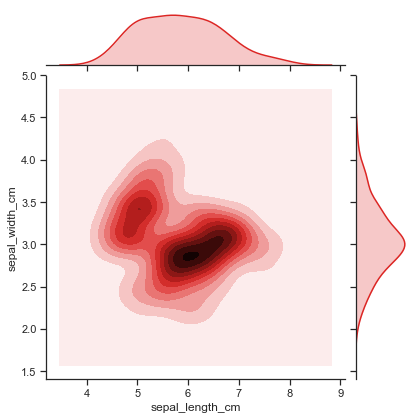

In [103]:
# 设置 kind =‘kde’ 用双变量分布图画出萼片长度和萼片宽度的一维分布
sns.jointplot( 'sepal_length_cm', 'sepal_width_cm',
                data=iris_data,
                kind='kde')

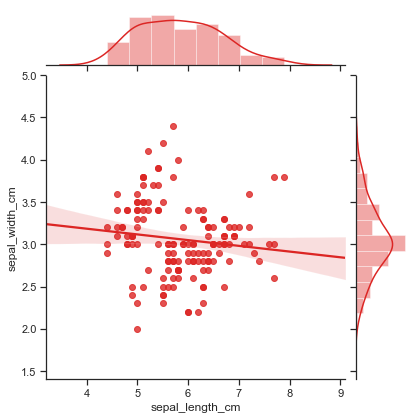

In [104]:
# 设置 kind =‘reg’ 用双变量分布图画出萼片长度和萼片宽度的线性关系
sns.jointplot( 'sepal_length_cm', 'sepal_width_cm',
                data=iris_data,
                kind='reg')